In [1]:
%pip install xgboost


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

step1:load the tarin data


In [3]:
import pandas as pd
df=pd.read_csv("train_weather.csv")
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


step2:perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['Weather Type'].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

above is multiclass classification peoblem beacause it has more than 2 class

step3:seperate x and y(weather type)

In [8]:
x=df.drop(columns=['Weather Type'])
y=df[['Weather Type']]

In [9]:
x.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain


In [10]:
y.head()

,Weather Type
0,Rainy
1,Cloudy
2,Sunny
3,Sunny
4,Rainy


sep5: Apply preprocessing pipeline on x

In [11]:
cat=list(x.columns[x.dtypes=='object'])
con=list(x.columns[x.dtypes!='object'])


In [12]:
cat

['Cloud Cover', 'Season', 'Location']

In [13]:
con

['Temperature',
 'Humidity',
 'Wind Speed',
 'Precipitation (%)',
 'Atmospheric Pressure',
 'UV Index',
 'Visibility (km)']

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer


In [15]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                         ('Scaler',StandardScaler())])

In [16]:
cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                         ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

In [21]:
pre=ColumnTransformer([('num',num_pipe,con),
                       ('cat',cat_pipe,cat)]).set_output(transform='pandas')

In [22]:
x_pre = pre.fit_transform(x)
x_pre.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Because i am working on xgboost, 

it's requires target feature

to be lebeled encoding 

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_pre=le.fit_transform(y)

In [25]:
y_pre[0:5]

array([1, 0, 3, 3, 1])

apply train  test split on x_pre and y_pre

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_pre,y_pre,test_size=0.2,random_state=42)

In [33]:
xtrain.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
3958,0.740404,-0.134243,-0.554712,1.200664,0.117804,-0.520104,-1.175461,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2239,-0.237413,1.351385,0.169040,0.105042,0.299802,-1.038715,-0.433923,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3608,0.510330,-0.530410,-0.482337,-1.334918,0.525351,1.554340,1.049153,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6848,1.603184,0.757134,5.018179,0.981540,-0.364746,-0.520104,-1.027154,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6119,-0.064857,-0.134243,0.603291,-1.366221,-0.155596,-0.779410,0.752538,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [35]:
ytrain[0:5]

array([1, 1, 3, 1, 0])

In [36]:
xtrain.shape

(10560, 18)

In [52]:
xtest[0:5]

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
4111,0.222737,-1.520829,-0.771838,-1.491435,0.412980,1.295035,1.345768,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10607,2.465964,1.252343,0.675666,0.918933,0.530728,1.554340,-0.433923,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7372,1.200553,-0.877057,-1.133714,-1.303614,0.519437,1.035729,0.752538,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11786,-1.502823,0.509529,-0.482337,1.138057,-0.329798,-1.038715,-1.175461,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
12227,0.107699,1.252343,0.024290,1.732823,0.588257,1.813646,1.049153,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [37]:
xtest.shape

(2640, 18)

In [53]:
ytest[0:5]

array([3, 3, 3, 2, 3])

step6:Model building


### xgboost
~~~python
import xgboost as xgb
~~~

1.Regression.for regression XGBRegressor need to call

objective-"reg.squarederror"

----in python------

model.xgb.XGBRegressor(objective="reg.squarederror")

2.Binary cllasification.for XGBClassifire

objective="binary:logistic"

model=xgb.XGBClassifire(objective="binary:logistic")

3.multiclass

objective="molti:softprob"

model=xgb.XGBClassifire(objective="multi:softprob")

In [38]:
import xgboost as xgb


In [43]:
model=xgb.XGBClassifier(objective="multi:softprob",n_estimators=300,
                        max_depth=3,
                        random_state=42)
model.fit(xtrain,ytrain,eval_set=[(xtest,ytest)])

[0]	validation_0-mlogloss:0.97147
[1]	validation_0-mlogloss:0.73961
[2]	validation_0-mlogloss:0.59453
[3]	validation_0-mlogloss:0.49711
[4]	validation_0-mlogloss:0.42963
[5]	validation_0-mlogloss:0.37995
[6]	validation_0-mlogloss:0.34550
[7]	validation_0-mlogloss:0.31773
[8]	validation_0-mlogloss:0.29676
[9]	validation_0-mlogloss:0.28140
[10]	validation_0-mlogloss:0.27045
[11]	validation_0-mlogloss:0.26128
[12]	validation_0-mlogloss:0.25350
[13]	validation_0-mlogloss:0.24705
[14]	validation_0-mlogloss:0.24239
[15]	validation_0-mlogloss:0.23729
[16]	validation_0-mlogloss:0.23383
[17]	validation_0-mlogloss:0.22940
[18]	validation_0-mlogloss:0.22719
[19]	validation_0-mlogloss:0.22441
[20]	validation_0-mlogloss:0.22247
[21]	validation_0-mlogloss:0.22027
[22]	validation_0-mlogloss:0.22021
[23]	validation_0-mlogloss:0.21890
[24]	validation_0-mlogloss:0.21854
[25]	validation_0-mlogloss:0.21761
[26]	validation_0-mlogloss:0.21682
[27]	validation_0-mlogloss:0.21576
[28]	validation_0-mlogloss:0.2

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [44]:
model.score(xtrain,ytrain)

0.9961174242424242

In [45]:
model.score(xtest,ytest)

0.9128787878787878

In [46]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,xtrain,ytrain,cv=5,scoring='f1_macro')

In [47]:
scores

array([0.91911932, 0.9086168 , 0.90742918, 0.91393434, 0.92101424])

In [48]:
scores.mean()

0.9140227744821485

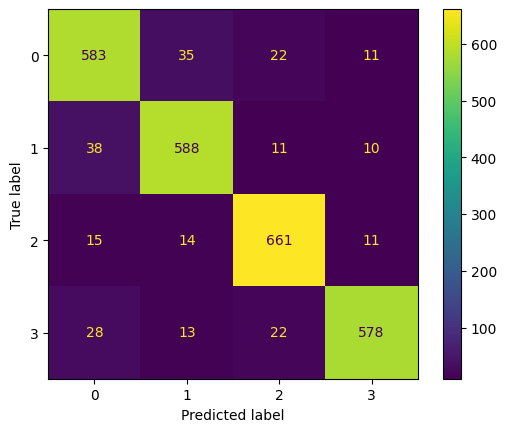

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,xtest,ytest)

Predict for train and test

In [50]:
ytrain_pred=model.predict(xtrain)
ytest_pred=model.predict(xtest)

In [54]:
ytest_pred[0:5]

array([3, 3, 3, 2, 3], dtype=int64)

In [55]:
ytest[0:5]

array([3, 3, 3, 2, 3])

In [56]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ytest_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       651
           1       0.90      0.91      0.91       647
           2       0.92      0.94      0.93       701
           3       0.95      0.90      0.92       641

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



In [57]:
le

LabelEncoder()

In [59]:
ytrain_pred_lab=le.inverse_transform(ytrain_pred)
ytest_pred_lab=le.inverse_transform(ytest_pred)

In [60]:
ytest_pred_lab[0:5]

array(['Sunny', 'Sunny', 'Sunny', 'Snowy', 'Sunny'], dtype=object)

In [61]:
ytrain_pred_lab[0:5]

array(['Rainy', 'Rainy', 'Sunny', 'Rainy', 'Cloudy'], dtype=object)